# Retail Dataset

In [77]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel('online_retail_II.xlsx')

In [3]:
df1 = pd.read_excel('online_retail_II.xlsx', 'Year 2009-2010')
df2 = pd.read_excel('online_retail_II.xlsx', 'Year 2010-2011')

In [4]:
data = pd.concat([df1, df2], ignore_index=True)

## Columns Description

#### InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
#### StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
#### Description: Product (item) name. Nominal.
#### Quantity: The quantities of each product (item) per transaction. Numeric.
#### InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
#### UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
#### CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
#### Country: Country name. Nominal. The name of the country where a customer resides.

### Renaming column names so that there are no spaces (two word names) and making them all lowercase.

In [5]:
data.columns.str.replace(' ',"_").str.lower()
data.columns = ['invoice_id', 'item_id', 'description', 'quantity', 'date',
              'price', 'customer_id', 'country']

In [6]:
data

,invoice_id,item_id,description,quantity,date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [7]:
for col in data.columns:
    print(f'There are {sum(data[col].isna())} missing values in the {col} column')

There are 0 missing values in the invoice_id column
There are 0 missing values in the item_id column
There are 4382 missing values in the description column
There are 0 missing values in the quantity column
There are 0 missing values in the date column
There are 0 missing values in the price column
There are 243007 missing values in the customer_id column
There are 0 missing values in the country column


In [8]:
df = data.dropna() 
print(f' {data.size - df.size} rows are dropped due to nans ({((data.size - df.size)/ data.size) * 100} %).') 

 1944056 rows are dropped due to nans (22.766872999172733 %).


In [9]:

# Display information about the dataset
print("\nInformation about the dataset:")
print(data.info())

# Display some basic statistical details
print("\nStatistical details of the dataset:")
print(data.describe())

# Check for any missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Information about the dataset:


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   invoice_id   1067371 non-null  object        
 1   item_id      1067371 non-null  object        
 2   description  1062989 non-null  object        
 3   quantity     1067371 non-null  int64         
 4   date         1067371 non-null  datetime64[ns]
 5   price        1067371 non-null  float64       
 6   customer_id  824364 non-null   float64       
 7   country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None

Statistical details of the dataset:
           quantity         price    customer_id
count  1.067371e+06  1.067371e+06  824364.000000
mean   9.938898e+00  4.649388e+00   15324.638504
std    1.727058e+02  1.235531e+02    1697.464450
min   -8.099500e+04 -5.359436e+04   12346.000000
25%    1.

In [10]:
data.invoice_id.unique().shape

(53628,)

In [11]:
data.item_id.unique().shape

(5305,)

In [12]:
data.date.min(), data.date.max()

(Timestamp('2009-12-01 07:45:00'), Timestamp('2011-12-09 12:50:00'))

In [13]:
data.country.unique().shape

(43,)

In [14]:
repeat_customers = data.groupby('customer_id')['invoice_id'].nunique()

# Select customers with more than one invoice (i.e., repeat purchasers)
repeat_customers = repeat_customers[repeat_customers > 1]
repeat_customers.shape

(4481,)

In [15]:
data['sales_amount'] = data['quantity'] * data['price']

# Display the updated DataFrame with the new 'SalesAmount' column
print("\nUpdated DataFrame with SalesAmount column:")
print(data.head())

# Group data by 'Invoice' and sum the sales amount for each invoice
invoice_sales = data.groupby('invoice_id')['sales_amount'].sum()

# Display sales amount by each invoice
print("\nSales amount by each invoice:")
print(invoice_sales)


Updated DataFrame with SalesAmount column:
  invoice_id item_id                          description  quantity  \
0     489434   85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1     489434  79323P                   PINK CHERRY LIGHTS        12   
2     489434  79323W                  WHITE CHERRY LIGHTS        12   
3     489434   22041         RECORD FRAME 7" SINGLE SIZE         48   
4     489434   21232       STRAWBERRY CERAMIC TRINKET BOX        24   

                 date  price  customer_id         country  sales_amount  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom          83.4  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom          81.0  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom         100.8  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom          30.0  

Sales amount by each invoice:
invoice_id
489434        505.30
489435        145.80
4

In [16]:
data

,invoice_id,item_id,description,quantity,date,price,customer_id,country,sales_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [17]:
invoice_sales.min(),invoice_sales.max()

(-168469.6, 168469.6)

In [18]:
data.sales_amount.quantile([0, 0.25, 0.5, 0.75, 1])

0.00   -168469.60
0.25         3.75
0.50         9.90
0.75        17.70
1.00    168469.60
Name: sales_amount, dtype: float64

In [19]:
data.query("sales_amount < 0")

,invoice_id,item_id,description,quantity,date,price,customer_id,country,sales_amount
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,-9.90
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,-17.00
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,-12.60
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,-35.40
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


# Demand Curve

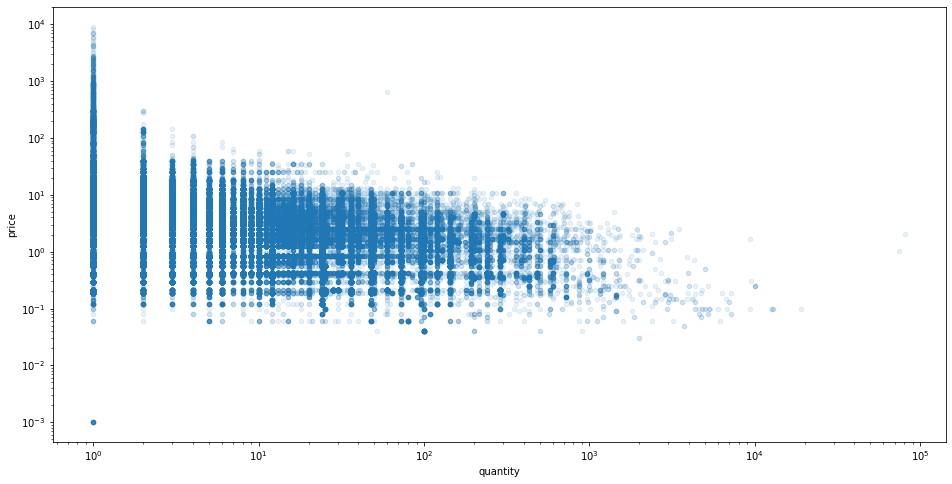

In [20]:
(
    data.query("price < 10000 & price > 0 & quantity > 0")
    .plot(x='quantity', y='price', 
          kind='scatter', 
          loglog=True, 
          alpha=0.1,
          figsize=(16, 8))
);

In [21]:
agg_daily_sales = (
    data.groupby("date")   # groupby 
    ['sales_amount']            # select a column
    .sum()               # function to apply
)
agg_daily_sales

date
2009-12-01 07:45:00     505.30
2009-12-01 07:46:00     145.80
2009-12-01 09:06:00     630.33
2009-12-01 09:08:00     310.75
2009-12-01 09:24:00    2286.24
                        ...   
2011-12-09 12:23:00     124.60
2011-12-09 12:25:00     140.64
2011-12-09 12:31:00     329.05
2011-12-09 12:49:00     339.20
2011-12-09 12:50:00     267.45
Name: sales_amount, Length: 47635, dtype: float64

<AxesSubplot:title={'center':'Total Sales - Daily Frequency'}, xlabel='date'>

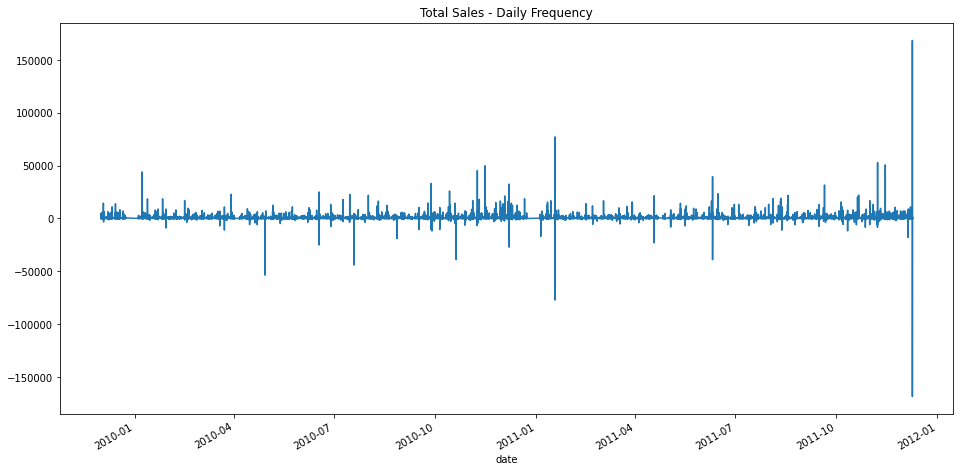

In [22]:
agg_daily_sales.plot(title = 'Total Sales - Daily Frequency',figsize=(16, 8))

# Aggregating on a weekly level for better granularity

<AxesSubplot:title={'center':'Total Sales - Weekly Frequency'}, xlabel='date'>

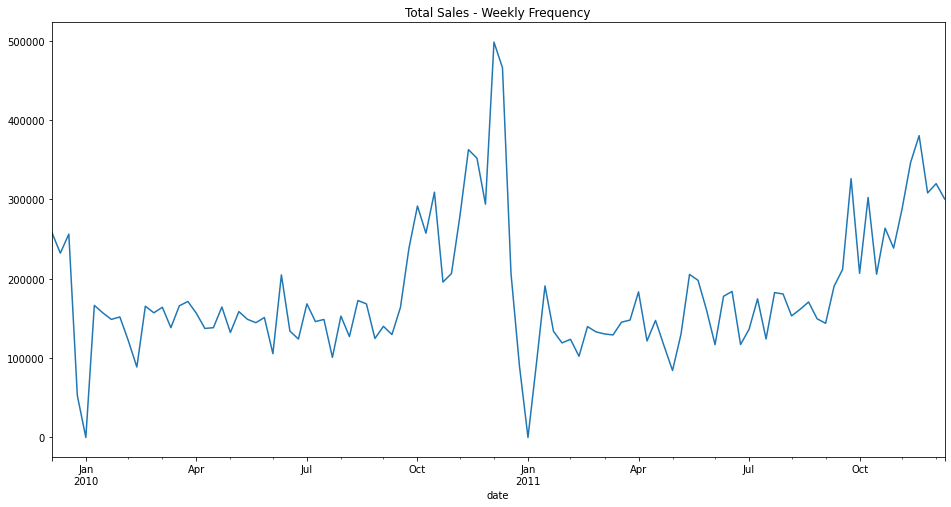

In [23]:
agg_daily_sales.resample("W").sum().plot(title = 'Total Sales - Weekly Frequency',figsize=(16, 8))

# Statistics for different countries

In [24]:
agg_country = (
    data.groupby("country")
    ['sales_amount']
    .agg(['std', 'sum', 'mean', 'median', 'count'])
).reset_index()


agg_country = agg_country.sort_values("sum", ascending=False)
agg_country.head()

,country,std,sum,mean,median,count
40,United Kingdom,303.033401,1.638258e+07,16.694266,8.47,981330
11,EIRE,106.460374,6.155196e+05,34.452007,17.40,17866
26,Netherlands,152.564837,5.485249e+05,106.716916,69.60,5140
15,Germany,36.718110,4.179886e+05,23.717009,17.00,17624
14,France,103.079727,3.281918e+05,22.902428,16.50,14330


In [25]:
agg_country.tail()

,country,std,sum,mean,median,count
22,Korea,19.365294,949.82,15.076508,17.70,63
9,Czech Republic,26.302604,707.72,23.590667,25.30,30
42,West Indies,9.122665,536.41,9.933519,7.53,54
32,Saudi Arabia,10.861336,131.17,13.117000,17.70,10
27,Nigeria,20.033587,-6.66,-0.208125,1.95,32


<AxesSubplot:title={'center':'Sales by Country'}, xlabel='country'>

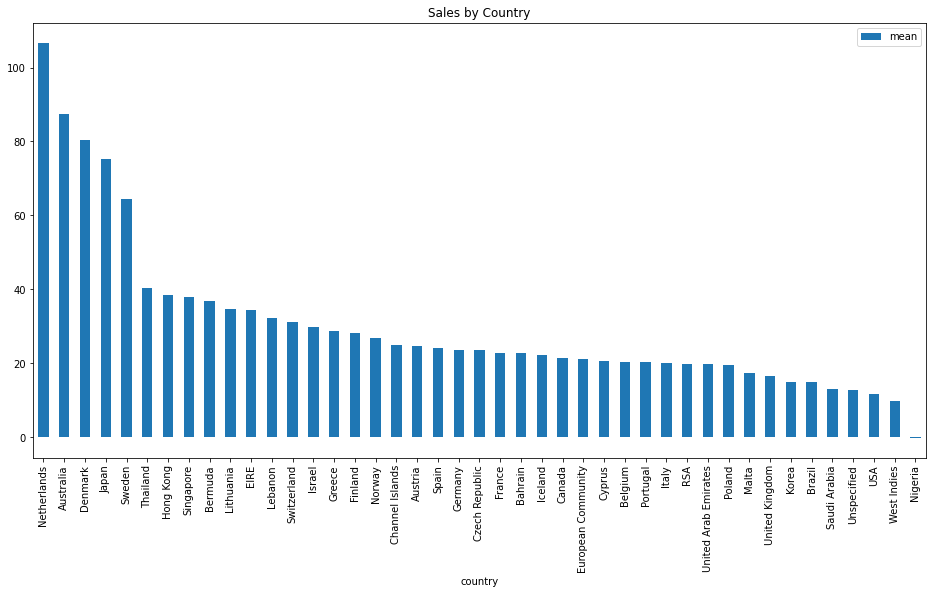

In [26]:
(agg_country
 .sort_values("mean", ascending=False)
 .plot(x='country', y='mean', kind='bar',title='Sales by Country',figsize=(16, 8))
)

In [27]:
data.country.value_counts(normalize=True)

United Kingdom          0.919390
EIRE                    0.016738
Germany                 0.016512
France                  0.013426
Netherlands             0.004816
Spain                   0.003570
Switzerland             0.002988
Belgium                 0.002926
Portugal                0.002455
Australia               0.001792
Channel Islands         0.001559
Italy                   0.001437
Norway                  0.001363
Sweden                  0.001278
Cyprus                  0.001102
Finland                 0.000983
Austria                 0.000879
Denmark                 0.000765
Unspecified             0.000708
Greece                  0.000621
Japan                   0.000545
Poland                  0.000501
USA                     0.000501
United Arab Emirates    0.000468
Israel                  0.000348
Hong Kong               0.000341
Singapore               0.000324
Malta                   0.000280
Iceland                 0.000237
Canada                  0.000214
Lithuania 

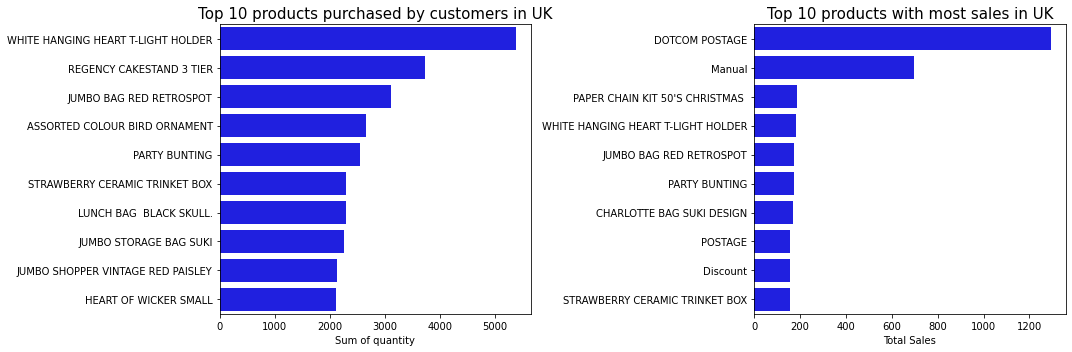

In [28]:
column = ['invoice_id','sales_amount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = data[data['country']=='United Kingdom'].groupby('description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = data[data['country']=='United Kingdom'].groupby('description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='blue')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers in UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales in UK',size=15)
        
plt.tight_layout()
plt.show()

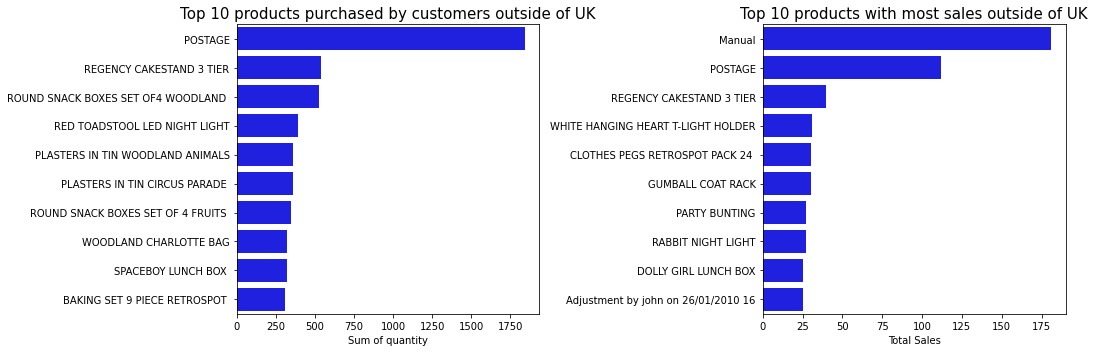

In [30]:
column = ['invoice_id','sales_amount']

plt.figure(figsize=(15,5))
for i,j in enumerate(column):
    plt.subplot(1,2,i+1)
    sns.barplot(x = data[data['country']!='United Kingdom'].groupby('description')[j].nunique().sort_values(ascending=False).head(10).values,
                y = data[data['country']!='United Kingdom'].groupby('description')[j].nunique().sort_values(ascending=False).head(10).index,
                color='blue')
    plt.ylabel('')
    if i==0:
        plt.xlabel('Sum of quantity')
        plt.title('Top 10 products purchased by customers outside of UK',size=15)
    else:
        plt.xlabel('Total Sales')
        plt.title('Top 10 products with most sales outside of UK',size=15)
        
plt.tight_layout()
plt.show()

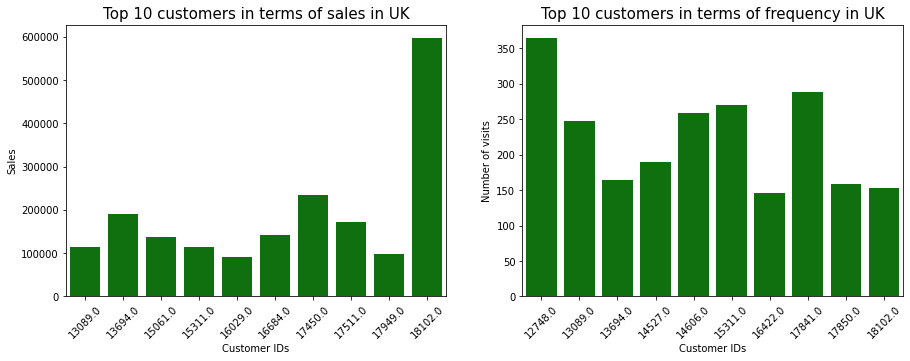

In [32]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.barplot(y = data[data['country']=='United Kingdom'].groupby('customer_id')['sales_amount'].sum().sort_values(ascending=False).head(10).values,
            x = data[data['country']=='United Kingdom'].groupby('customer_id')['sales_amount'].sum().sort_values(ascending=False).head(10).index, 
            color='green')
plt.ylabel('Sales')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of sales in UK',size=15)

plt.subplot(1,2,2)
sns.barplot(y = df[df['country']=='United Kingdom'].groupby('customer_id')['invoice_id'].nunique().sort_values(ascending=False).head(10).values,
            x = df[df['country']=='United Kingdom'].groupby('customer_id')['invoice_id'].nunique().sort_values(ascending=False).head(10).index, 
            color='green')
plt.ylabel('Number of visits')
plt.xlabel('Customer IDs')
plt.xticks(rotation=45)
plt.title('Top 10 customers in terms of frequency in UK',size=15)

plt.show()

In [34]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek

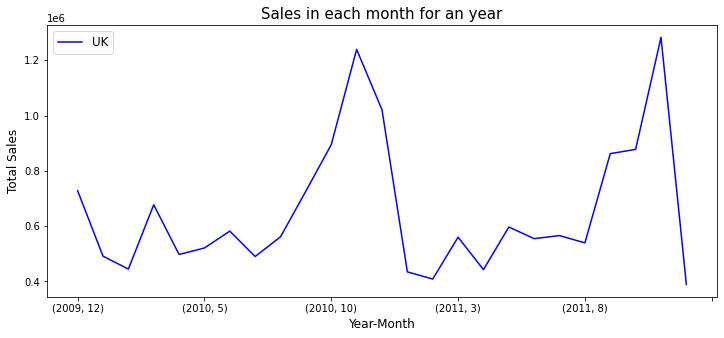

In [35]:
plt.figure(figsize=(12,5))
data[data['country']=='United Kingdom'].groupby(['year','month'])['sales_amount'].sum().plot(kind='line',label='UK',color='blue')
plt.xlabel('Year-Month',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each month for an year', size=15)
plt.legend(fontsize=12)
plt.show()

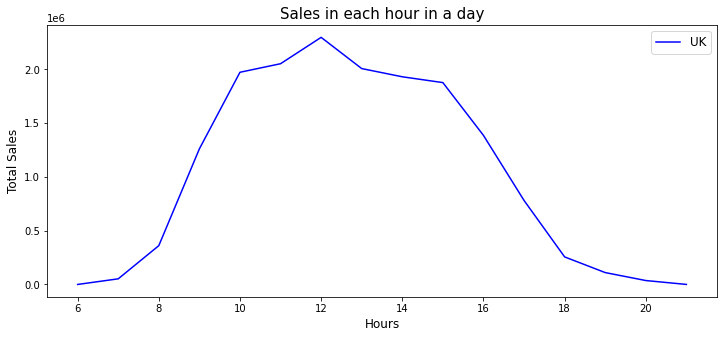

In [36]:
plt.figure(figsize=(12,5))
data[data['country']=='United Kingdom'].groupby(['hour'])['sales_amount'].sum().plot(kind='line',label='UK',color='blue')
plt.xlabel('Hours',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()

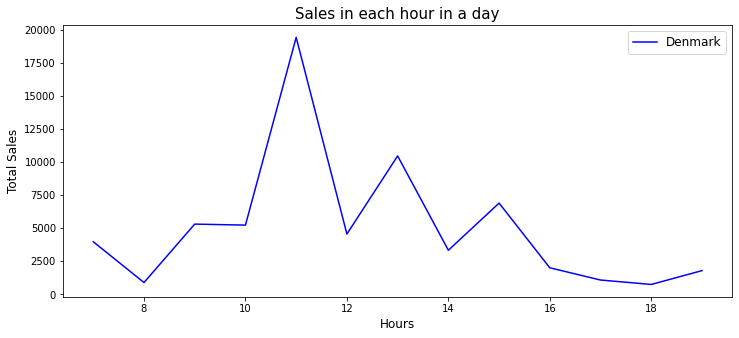

In [37]:
plt.figure(figsize=(12,5))
data[data['country']=='Denmark'].groupby(['hour'])['sales_amount'].sum().plot(kind='line',label='Denmark',color='blue')
plt.xlabel('Hours',size=12)
plt.ylabel('Total Sales', size=12)
plt.title('Sales in each hour in a day', size=15)
plt.legend(fontsize=12)
plt.show()

In [38]:
individual_customer = data.groupby('customer_id')['sales_amount'].sum()

In [39]:
individual_customer = individual_customer.reset_index()

In [40]:
individual_customer

,customer_id,sales_amount
0,12346.0,-64.68
1,12347.0,5633.32
2,12348.0,2019.40
3,12349.0,4404.54
4,12350.0,334.40
...,...,...
5937,18283.0,2736.65
5938,18284.0,436.68
5939,18285.0,427.00
5940,18286.0,1188.43


#### We can also find out how many times a specific cutstomer has visited the store

In [47]:
individual_customer_freq = data.groupby('customer_id')['invoice_id'].count()


In [48]:
individual_customer_freq = individual_customer_freq.reset_index()

In [49]:
individual_customer_freq

,customer_id,invoice_id
0,12346.0,48
1,12347.0,253
2,12348.0,51
3,12349.0,180
4,12350.0,17
...,...,...
5937,18283.0,986
5938,18284.0,29
5939,18285.0,12
5940,18286.0,70


### Here we have taken ‘Count’ of each invoices for each customer so that we can get a total number of invoices for each customer.¶

In [50]:
customer_details = pd.merge(individual_customer,individual_customer_freq,on='customer_id')

In [51]:
customer_details

,customer_id,sales_amount,invoice_id
0,12346.0,-64.68,48
1,12347.0,5633.32,253
2,12348.0,2019.40,51
3,12349.0,4404.54,180
4,12350.0,334.40,17
...,...,...,...
5937,18283.0,2736.65,986
5938,18284.0,436.68,29
5939,18285.0,427.00,12
5940,18286.0,1188.43,70


We can also further get more details like which customers have not visited store for a long time and which have.By this we can cluster Customers which have not visited and see the underlying pattern.

This all can be done by the column ‘invoiceDate’ which contains the datetime with respect to each invoice.

First we need to make sure that the columns is in datetime format ,if not we need to convert it to datetime format.

In [52]:
max_date = max(data['date'])
data['recency']=max_date-data['date']

In [53]:
data

,invoice_id,item_id,description,quantity,date,price,customer_id,country,sales_amount,Country,year,month,day,hour,day_of_week,recency
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40,United Kingdom,2009,12,1,7,1,738 days 05:05:00
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,United Kingdom,2009,12,1,7,1,738 days 05:05:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00,United Kingdom,2009,12,1,7,1,738 days 05:05:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80,United Kingdom,2009,12,1,7,1,738 days 05:05:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00,United Kingdom,2009,12,1,7,1,738 days 05:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,Others,2011,12,9,12,4,0 days 00:00:00
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Others,2011,12,9,12,4,0 days 00:00:00
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,Others,2011,12,9,12,4,0 days 00:00:00
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,Others,2011,12,9,12,4,0 days 00:00:00


Now we can groupby each customer and take out the .min() from the recency column to get the days when the customer was last seen.

In [54]:
dates = data.groupby('customer_id')['recency'].min()

In [55]:
dates = dates.reset_index()

In [56]:
dates['recency'] = dates['recency'].dt.days

In [57]:
dates

,customer_id,recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
5937,18283.0,3
5938,18284.0,429
5939,18285.0,660
5940,18286.0,476


In [58]:
customer_details = pd.merge(customer_details,dates,on='customer_id')

In [59]:
customer_details

,customer_id,sales_amount,invoice_id,recency
0,12346.0,-64.68,48,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4404.54,180,18
4,12350.0,334.40,17,309
...,...,...,...,...
5937,18283.0,2736.65,986,3
5938,18284.0,436.68,29,429
5939,18285.0,427.00,12,660
5940,18286.0,1188.43,70,476


We need to remove any outliers to form good clusters

In [60]:
z = customer_details.sales_amount.quantile(0.05)

In [62]:
y = customer_details.sales_amount.quantile(0.95)

In [63]:
iqr = y-z

Here the quantile function is very important,what it does is it gives us the value for the first 5% of the Distribution on data in Amount column and same for 95%.(0.95).The value which we get shows that 5% & 95 % of data in our column is less than(5%) and greater than(95%).

We can get the interquartile range for the above quantile functions by subtracting 95 percentile with 5 percentile.

In [64]:
customer_details = customer_details[(customer_details['sales_amount']>=z-1.5*iqr) & (customer_details['sales_amount']<=y+1.5*iqr)]

In [65]:
customer_details

,customer_id,sales_amount,invoice_id,recency
0,12346.0,-64.68,48,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4404.54,180,18
4,12350.0,334.40,17,309
...,...,...,...,...
5937,18283.0,2736.65,986,3
5938,18284.0,436.68,29,429
5939,18285.0,427.00,12,660
5940,18286.0,1188.43,70,476


Here we have used the quartile values to remove the outliers from the Amount column ,anything which is below ‘z-1.5iqr’ and anything above ‘y+1.5iqr’ will be removed.This is the standard way to remove outliers.Repeating these steps for other features.

In [66]:
q1 = customer_details.invoice_id.quantile(0.05)
q3 = customer_details.invoice_id.quantile(0.95)
iqr = q3 - q1
customer_details = customer_details[(customer_details['recency']>=q1-1.5*iqr) & (customer_details['recency']<=q3+1.5*iqr)]

In [67]:
customer_details

,customer_id,sales_amount,invoice_id,recency
0,12346.0,-64.68,48,325
1,12347.0,5633.32,253,1
2,12348.0,2019.40,51,74
3,12349.0,4404.54,180,18
4,12350.0,334.40,17,309
...,...,...,...,...
5937,18283.0,2736.65,986,3
5938,18284.0,436.68,29,429
5939,18285.0,427.00,12,660
5940,18286.0,1188.43,70,476


Once we have removed the outliers we can scale the data as the scaling standards differ alot between the columns.

In [69]:
scc = StandardScaler()

In [70]:
scaled_df = scc.fit_transform(customer_details[['sales_amount','invoice_id','recency']])

In [72]:
scaled_df.shape

(5865, 3)

In [73]:
scaled_values = pd.DataFrame(scaled_df)

In [75]:
scaled_values.columns = ['sales_amount','invoice_id','recency']

In [76]:
scaled_values

,sales_amount,invoice_id,recency
0,-0.664064,-0.376204,0.570431
1,1.278238,0.686280,-0.957747
2,0.046345,-0.360655,-0.613435
3,0.859378,0.307932,-0.877565
4,-0.528028,-0.536872,0.494965
...,...,...,...
5860,0.290837,4.485307,-0.948314
5861,-0.493163,-0.474678,1.060957
5862,-0.496463,-0.562787,2.150491
5863,-0.236911,-0.262181,1.282637


Now as we know in Kmeans cluster we need to provide ‘K’ value for the algorithm as the no of clusters.We can find out the optimal value for K with elbow graph.

In [78]:
scores=[]
for i in range(2,7):
    kmeans = KMeans(n_clusters=i,max_iter=40,verbose=True).fit(scaled_values)
    scores.append(kmeans.inertia_)

Initialization complete
Iteration 0, inertia 16736.270155065275
Iteration 1, inertia 11812.283509046727
Iteration 2, inertia 11671.728108013202
Iteration 3, inertia 11642.369004677645
Iteration 4, inertia 11636.48973982751
Iteration 5, inertia 11634.602950557808
Iteration 6, inertia 11634.122419203537
Converged at iteration 6: center shift 3.763094008496055e-05 within tolerance 0.00010000000000000014.
Initialization complete
Iteration 0, inertia 15149.78875117087
Iteration 1, inertia 10631.02114455518
Iteration 2, inertia 10615.116710684726
Iteration 3, inertia 10606.640040039518
Iteration 4, inertia 10601.907052476734
Iteration 5, inertia 10600.21410307274
Iteration 6, inertia 10599.747245299483
Iteration 7, inertia 10599.232654652737
Iteration 8, inertia 10598.780044893643
Iteration 9, inertia 10597.89888027306
Iteration 10, inertia 10597.542858432236
Converged at iteration 10: center shift 5.909629462619908e-05 within tolerance 0.00010000000000000014.
Initialization complete
Iterati

In [79]:
len(scores)

5

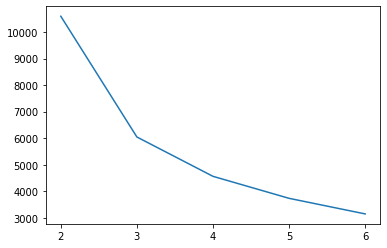

In [81]:
plt.plot(range(2,7,1),scores)
plt.xticks(range(2,7,1))
plt.show()

The Calinski-Harabasz index also known as the Variance Ratio Criterion, is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters, the higher the score , the better the performances.

The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion. The C-H Index is a great way to evaluate the performance of a Clustering algorithm as it does not require information on the ground truth labels.

### Result evaluation

In [82]:
from sklearn.metrics import calinski_harabasz_score
for i in range(2,7):
    kmeans = KMeans(n_clusters=i,max_iter=40).fit(scaled_values)
    cluster_labels=kmeans.labels_
    cal = calinski_harabasz_score(scaled_values,cluster_labels)
    print('For n_cluster{}  Calinski score is {}'.format(i,cal))

For n_cluster2  Calinski score is 3871.3399427944587
For n_cluster3  Calinski score is 5600.9348722626255
For n_cluster4  Calinski score is 5583.00732167085
For n_cluster5  Calinski score is 5443.1628211560865
For n_cluster6  Calinski score is 5386.7135853519385


In [83]:
kmeans = KMeans(n_clusters=3,max_iter=50,verbose=True).fit(scaled_values)
clusters = kmeans.labels_

Initialization complete
Iteration 0, inertia 9326.118438111744
Iteration 1, inertia 6784.488287004347
Iteration 2, inertia 6309.2654759232355
Iteration 3, inertia 6140.582137715172
Iteration 4, inertia 6073.427498185561
Iteration 5, inertia 6055.141969336032
Iteration 6, inertia 6049.298843937995
Iteration 7, inertia 6047.894160875458
Iteration 8, inertia 6047.099589388984
Iteration 9, inertia 6045.9575233653395
Iteration 10, inertia 6045.010284480869
Iteration 11, inertia 6044.473734126066
Converged at iteration 11: center shift 1.693532541301194e-05 within tolerance 0.00010000000000000014.
Initialization complete
Iteration 0, inertia 8844.281281649235
Iteration 1, inertia 7867.664442473686
Iteration 2, inertia 7153.099427847847
Iteration 3, inertia 6331.694213839761
Iteration 4, inertia 6111.225866316219
Iteration 5, inertia 6066.604896803514
Iteration 6, inertia 6051.667031477455
Iteration 7, inertia 6048.805484056591
Iteration 8, inertia 6047.667359417798
Iteration 9, inertia 6046.

In [84]:
customer_details['cluster'] = clusters

In [85]:
customer_details

,customer_id,sales_amount,invoice_id,recency,cluster
0,12346.0,-64.68,48,325,0
1,12347.0,5633.32,253,1,2
2,12348.0,2019.40,51,74,2
3,12349.0,4404.54,180,18,2
4,12350.0,334.40,17,309,0
...,...,...,...,...,...
5937,18283.0,2736.65,986,3,1
5938,18284.0,436.68,29,429,0
5939,18285.0,427.00,12,660,0
5940,18286.0,1188.43,70,476,0


Here we have created our final model with 3 clusters and added our cluster labels obtained from ‘kmeans.labels_’ to our Dataframe consisting of Unique customers.

With the help of boxplots we can visualize the clusters formed on different features:

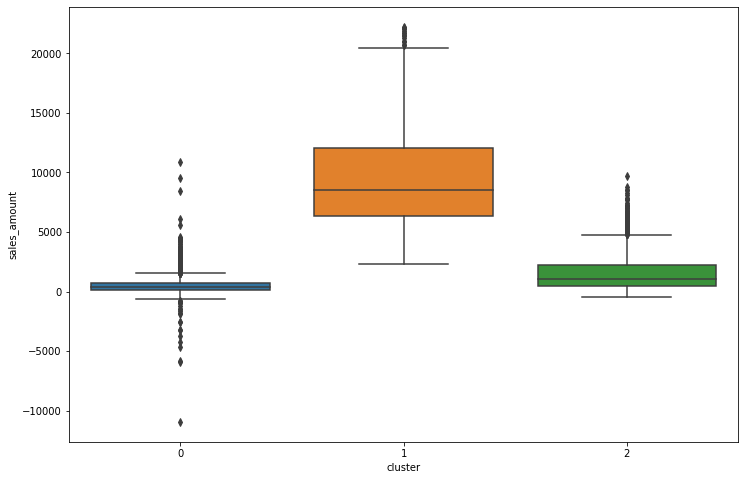

In [96]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='cluster',y='sales_amount',data=customer_details)
plt.show()

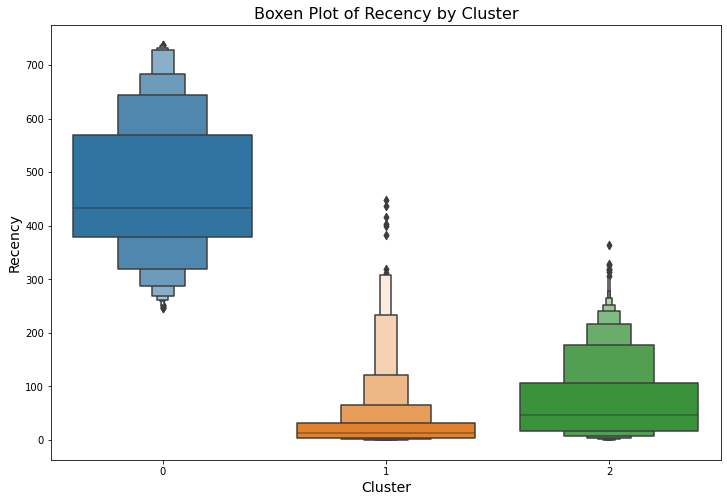

In [95]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x='cluster',y='recency',data=customer_details)
plt.title('Boxen Plot of Recency by Cluster', fontsize=16)
plt.xlabel('Cluster', fontsize=14)
plt.ylabel('Recency', fontsize=14)
plt.show()